<a href="https://colab.research.google.com/github/Charles-Nk/myrepo/blob/master/QMSS_Practicum_SCLC_2015_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparation** 

In [ ]:
# Importing/installing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
!pip install kneed

In [ ]:
df = pd.read_excel('sclc_ucologne_2015_clinical_data.xlsx')

print(df.head())

             Study ID                 Patient ID                  Sample ID  \
0  sclc_ucologne_2015  sclc_ucologne_2015_S00022  sclc_ucologne_2015_S00022   
1  sclc_ucologne_2015  sclc_ucologne_2015_S00035  sclc_ucologne_2015_S00035   
2  sclc_ucologne_2015  sclc_ucologne_2015_S00050  sclc_ucologne_2015_S00050   
3  sclc_ucologne_2015  sclc_ucologne_2015_S00213  sclc_ucologne_2015_S00213   
4  sclc_ucologne_2015  sclc_ucologne_2015_S00339  sclc_ucologne_2015_S00339   

   Diagnosis Age             Cancer Type    Cancer Type Detailed Chemotherapy  \
0           47.0  Small Cell Lung Cancer  Small Cell Lung Cancer          Yes   
1           65.0  Small Cell Lung Cancer  Small Cell Lung Cancer          Yes   
2           47.0  Small Cell Lung Cancer  Small Cell Lung Cancer          Yes   
3           65.0  Small Cell Lung Cancer  Small Cell Lung Cancer          NaN   
4           61.0  Small Cell Lung Cancer  Small Cell Lung Cancer          NaN   

  Ethnicity Category Gene Panel Metast

# **Preprocessing**

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in multiple relevant columns.
cols = ['Chemotherapy', 'Ethnicity Category', 'Gene Panel','M Stage', 'Neoadjuvant Chemotherapy', 'N Stage', 'Overall Survival Status', 'Previous Treatment', 'Radiation Therapy', 'Sample Type', 'Sex', 'Smoker', 'Smoking History', 'Somatic Status', 'T Stage', 'UICC Tumor Stage']
df[cols] = df[cols].apply(label_encoder.fit_transform)

df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Chemotherapy,Ethnicity Category,Gene Panel,Metastatic Site,...,Number of Samples Per Patient,Sample Type,Sex,Smoker,Smoking History,Somatic Status,Specimen Preservation Type,TMB (nonsynonymous),T Stage,UICC Tumor Stage
0,sclc_ucologne_2015,sclc_ucologne_2015_S00022,sclc_ucologne_2015_S00022,47.0,Small Cell Lung Cancer,Small Cell Lung Cancer,1,2,3,NaN,...,1,1,1,0,28,0,FF Tissue,6.066667,0,4
1,sclc_ucologne_2015,sclc_ucologne_2015_S00035,sclc_ucologne_2015_S00035,65.0,Small Cell Lung Cancer,Small Cell Lung Cancer,1,2,3,NaN,...,1,1,0,1,28,0,FF Tissue,7.733333,6,8
2,sclc_ucologne_2015,sclc_ucologne_2015_S00050,sclc_ucologne_2015_S00050,47.0,Small Cell Lung Cancer,Small Cell Lung Cancer,1,2,3,NaN,...,1,1,1,0,28,0,FF Tissue,10.600000,0,9
3,sclc_ucologne_2015,sclc_ucologne_2015_S00213,sclc_ucologne_2015_S00213,65.0,Small Cell Lung Cancer,Small Cell Lung Cancer,2,2,0,NaN,...,1,1,1,7,28,1,FF Tissue,0.000000,0,4
4,sclc_ucologne_2015,sclc_ucologne_2015_S00339,sclc_ucologne_2015_S00339,61.0,Small Cell Lung Cancer,Small Cell Lung Cancer,2,2,3,NaN,...,1,1,1,7,28,0,FF Tissue,2.933333,3,4


In [ ]:
df.describe()

,Diagnosis Age,Chemotherapy,Ethnicity Category,Gene Panel,Mutation Count,M Stage,Neoadjuvant Chemotherapy,N Stage,Overall Survival (Months),Overall Survival Status,...,Radiation Therapy,Number of Samples Per Patient,Sample Type,Sex,Smoker,Smoking History,Somatic Status,TMB (nonsynonymous),T Stage,UICC Tumor Stage
count,119.000000,120.000000,120.000000,120.000000,110.000000,120.000000,120.000000,120.00000,110.000000,120.000000,...,120.000000,120.0,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,64.974790,0.950000,1.308333,2.825000,268.336364,1.058333,0.258333,1.47500,30.254545,0.775000,...,0.858333,1.0,0.97500,0.633333,1.533333,19.725000,0.083333,8.195556,3.691667,6.866667
std,9.091309,0.684154,0.707651,0.763258,140.763141,1.759946,0.641634,1.58757,29.947488,0.571927,...,0.781034,0.0,0.15678,0.483915,2.365485,8.421623,0.277544,5.129801,2.842640,2.516945
min,33.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,1.000000,3.000000,183.250000,0.000000,0.000000,0.00000,10.000000,0.000000,...,0.000000,1.0,1.00000,0.000000,0.000000,13.000000,0.000000,5.016667,1.000000,4.000000
50%,65.000000,1.000000,1.000000,3.000000,234.000000,0.000000,0.000000,1.00000,21.500000,1.000000,...,1.000000,1.0,1.00000,1.000000,1.000000,20.000000,0.000000,7.533333,3.000000,8.000000
75%,71.000000,1.000000,2.000000,3.000000,350.000000,1.000000,0.000000,2.00000,41.250000,1.000000,...,1.000000,1.0,1.00000,1.000000,1.000000,28.000000,0.000000,11.241667,6.000000,9.000000
max,83.000000,2.000000,2.000000,5.000000,734.000000,5.000000,2.000000,5.00000,164.000000,2.000000,...,2.000000,1.0,1.00000,1.000000,7.000000,28.000000,1.000000,24.433333,9.000000,11.000000


#**K-Means Clustering**

###**Defining the Inputs**

In [ ]:
# Dropping variables we won't be using in the clustering
# And filling the NA values with the median values
drop_variables = ['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed', 'Metastatic Site', 'First Pathologic Diagnosis Biospecimen Acquisition Method Type', 'Oncotree Code', 'Number of Samples Per Patient', 'Specimen Preservation Type']

data = df.drop(columns = drop_variables).fillna(df.median())

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Diagnosis Age,Chemotherapy,Ethnicity Category,Gene Panel,Mutation Count,M Stage,Neoadjuvant Chemotherapy,N Stage,Overall Survival (Months),Overall Survival Status,...,Previous Treatment,Radiation Therapy,Sample Type,Sex,Smoker,Smoking History,Somatic Status,TMB (nonsynonymous),T Stage,UICC Tumor Stage
0,47.0,1,2,3,183.0,0,0,2,38.0,1,...,1,1,1,1,0,28,0,6.066667,0,4
1,65.0,1,2,3,232.0,1,0,1,12.0,1,...,1,0,1,0,1,28,0,7.733333,6,8
2,47.0,1,2,3,318.0,0,0,0,42.0,1,...,1,1,1,1,0,28,0,10.600000,0,9
3,65.0,2,2,0,234.0,0,2,2,13.0,1,...,1,2,1,1,7,28,1,0.000000,0,4
4,61.0,2,2,3,88.0,0,2,2,21.5,2,...,1,2,1,1,7,28,0,2.933333,3,4


###**Selecting the Number of Clusters using the Elbow Method**

In [ ]:
# We will use the elbow method, which plots the within-cluster-sum-of-squares (WCSS) versus the number of clusters
# We need to define a for-loop that contains instances of the K-means class
# The for-loop will iterate over cluster numbers 1 through 10
# We will also initialize a list that we will use to append the WCSS values

# We then append the WCSS values to our list
# We access these values through the inertia attribute of the K-means object

wcss = list()

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


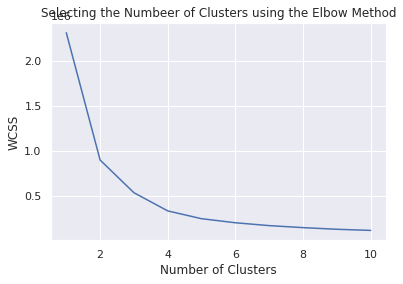

In [ ]:
# We plot the WCSS versus the number of clusters
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# We use the knee-point detection in Python to determine where the “elbow” of the curve appears and thus the optimum number of clusters
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

###**Converting our Dataset from Multidimensions to 2 Dimensions**

In [ ]:
# We are using the first 2 components with highest variance to visualise the dataset
pca = PCA(2)
X = pca.fit_transform(data)

###**Plotting the Clusters**

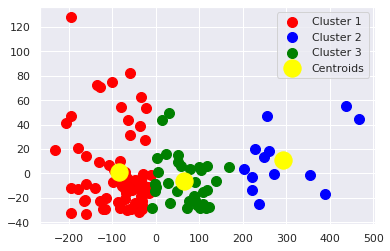

In [ ]:
# Since we have only 2 Principal Components, we will get a 2D scatterplot with 3 clusters
# We are going to use the fit predict method that returns for each observation which cluster it belongs to
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plotting the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

plt.legend()
plt.show()